In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
# Read image
img = cv.imread("ntust_gray.jpg",0)
# Show information of image
print(img.dtype)
print(img.shape)

uint8
(480, 640)


In [3]:
# Turn to double type, and range in [0,1]
img = img.astype(float) / 255

In [4]:
# Mean filter
def get_input(s):
    while True:
        try:
            n = int(input('Enter %s: ' % s))
        except ValueError:
            print('Error: Invalid Input.')
        if n%2 == 0 :
            raise ValueError('n=%d is a even value!' % n)
        return n

n = get_input('n of filter (odd)')
filter = np.ones([n,n])/(n**2)

In [5]:
# Convolution
rows, colums=img.shape
tmp = np.zeros(img.shape)
k=int((n-1)/2)
for row in range(rows):
    for colum in range(colums):
        if ((row-k > 0)&(colum-k > 0)&(row+k < rows)&(colum+k < colums)):
            tmp[row, colum] = np.sum(np.multiply(img[row-k:row+k+1,colum-k:colum+k+1],filter))

In [6]:
# Unsharp Masking 0.8*(a-b)+a
result = 0.8*(img-tmp)+img
result = result*255/np.max(result) 

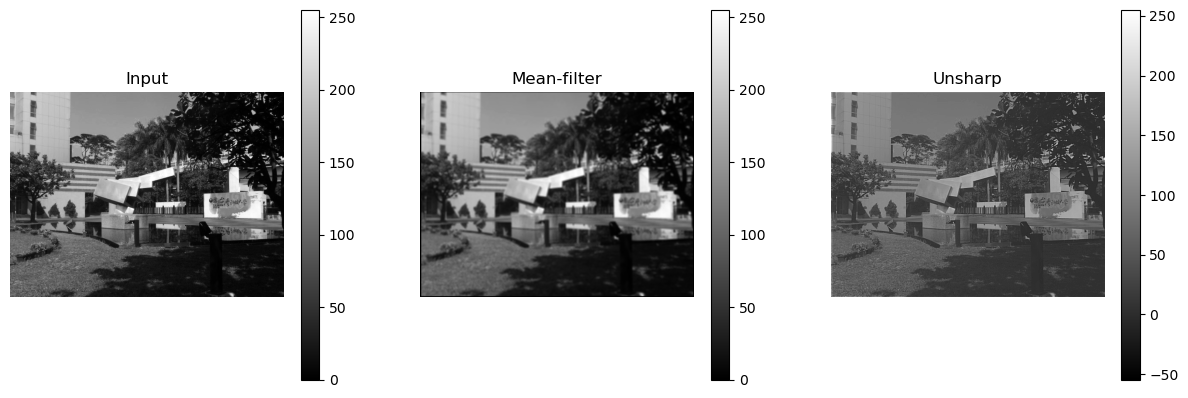

In [7]:
# Create folder
if not os.path.exists('images'):    
    os.makedirs('images')

# Show all images
imgs = [img*255, tmp*255, result]
titles = ['Input', 'Mean-filter', 'Unsharp']
fig = plt.figure()
fig.set_figwidth(15)
for i in range(3):
    # Save each image
    cv.imwrite('images/'+titles[i]+'.jpg', imgs[i])
    # Plot image    
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.colorbar()
plt.savefig('images/All-Result-Unsharp.jpg')
plt.show()